# Homework 1

## Business 35137 - Spring 2025

### University of Chicago


* Jae Jung
* jaejung@uchicago.edu

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

import sys
sys.path.insert(0, '../cmds')
from helper_functions import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



------------------------------------------------------------------------------------------
## Problem 1. 


Download the file `gw.csv` from canvas. This file contains monthly S&P 500 index returns
along with a series of predictors used to forecast the market.

The S&P returns are offset by one month from the predictors. In the first part of the problem set we will explore how well
we can forecast market returns using machine learning methods.

In [2]:
# Download `gw.csv'
p1 = pd.read_csv('../data/gw.csv')

display(p1.head())


,yyyymm,dfy_lag1,infl_lag1,svar_lag1,de_lag1,lty_lag1,tms_lag1,tbl_lag1,dfr_lag1,dp_lag1,dy_lag1,ltr_lag1,ep_lag1,b/m_lag1,ntis_lag1,CRSP_SPvw_minus_Rfree
0,192701,0.0100,0.000000,0.000465,-0.586175,0.0354,0.0047,0.0307,-0.0022,-2.973012,-2.956570,0.0078,-2.386837,0.441476,0.050876,-0.005410
1,192702,0.0095,-0.011299,0.000470,-0.567601,0.0351,0.0028,0.0323,-0.0019,-2.942374,-2.963349,0.0075,-2.374773,0.443706,0.050824,0.042922
2,192703,0.0092,-0.005714,0.000287,-0.549182,0.0347,0.0018,0.0329,-0.0019,-2.979535,-2.932946,0.0088,-2.430353,0.428501,0.051668,0.004324
3,192704,0.0092,-0.005747,0.000924,-0.531456,0.0331,0.0011,0.0320,-0.0170,-2.976535,-2.970053,0.0253,-2.445079,0.469765,0.046357,0.010521
4,192705,0.0090,0.000000,0.000603,-0.512916,0.0333,-0.0006,0.0339,0.0060,-2.984225,-2.967143,-0.0005,-2.471309,0.456754,0.050514,0.059353


## a.
For each of the predictors, regress the S&P 500 index returns on the predictor using the
full sample of data. Report the $R^2s$ of these regressions. Next, evaluate the out-of-sample
performance of each predictor individually using an expanding sample of data starting in
1965. How do the out-of-sample $R^2s$ compare to the in-sample $R^2s$? Interpret what this
means for the usefulness of these predictors in forecasting the market.

In [3]:
start_date = '1965-01-01'
regressand = 'CRSP_SPvw_minus_Rfree'

r2_results = compute_r2s(p1, target_col= regressand, start_oos=start_date)

display(r2_results)

,In-Sample R^2,Out-of-Sample R^2
b/m_lag1,0.006005,-0.034282
ntis_lag1,0.004855,-0.014691
dy_lag1,0.004023,-0.011630
tbl_lag1,0.003436,-0.001042
ep_lag1,0.003258,-0.018206
dp_lag1,0.002990,-0.007564
dfy_lag1,0.002671,-0.000669
infl_lag1,0.002639,0.000713
ltr_lag1,0.002437,-0.002524
lty_lag1,0.002113,-0.007292


- We can see that out-of-sample $R^2$ is lower than in-sample $R^2$ for all predictors. This suggests that the predictors are not very useful for forecasting the market.
- The predictors are not very useful for forecasting the market because they are not able to explain a significant portion of the variation in the market returns out-of-sample. This suggests that the predictors may be overfitting the data and not capturing the true underlying relationship between the predictors and the market returns.
- The predictors may be capturing noise in the data rather than the true underlying relationship between the predictors and the market returns. This suggests that the predictors may not be reliable for forecasting the market in the future.

------------------------------------------------------------------------------------------

## b.
Next, try the same expanding sample exercise but include all the predictors in a single
regression, compare the out-of-sample $R^2$ here to those in part (a). Let’s now incorporate
a penalty term into the regression to counteract overfitting. Compute results for lasso,
ridge, and elastic net and use K-fold cross-validation to select the optimal penalty term.
Plot the out-of-sample $R^2$ for each month for each of the three methods along with the
un-penalized regression. How do the methods compare? What does this tell us about the
predictability of market returns?   

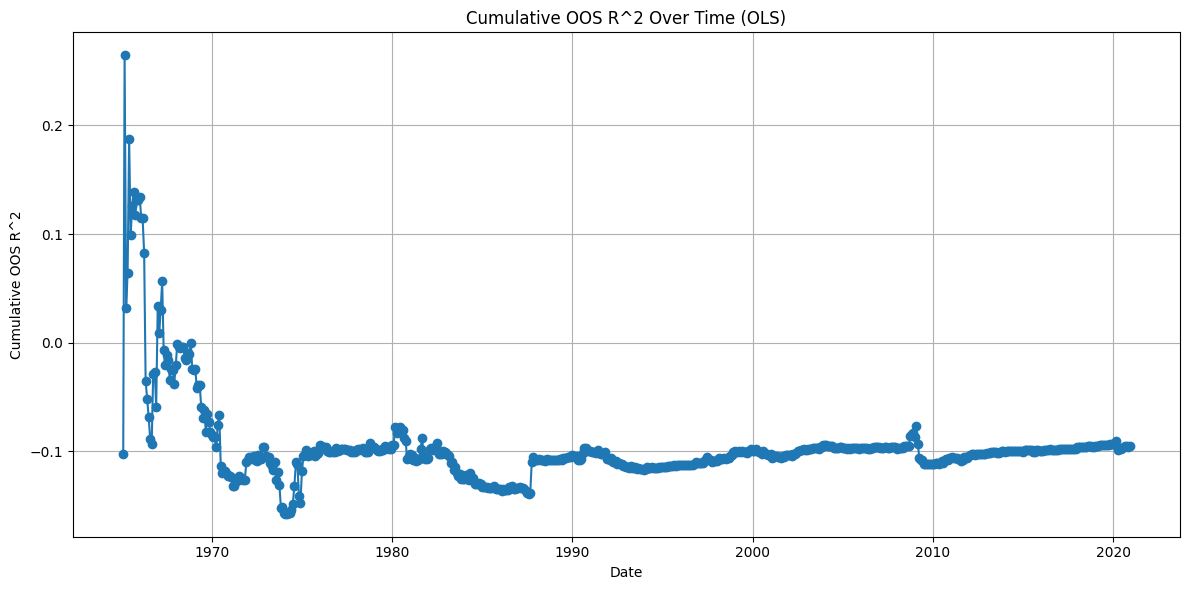

,Method,In-Sample R^2,Out-of-Sample R^2
0,OLS,0.030644,-0.094908


In [4]:
result_ols = regression_with_regulariser(p1, 
                                          target_col='CRSP_SPvw_minus_Rfree', 
                                          start_oos='1965-01-01', 
                                          regulariser='OLS', 
                                          plot=True, 
                                          )


result_ols



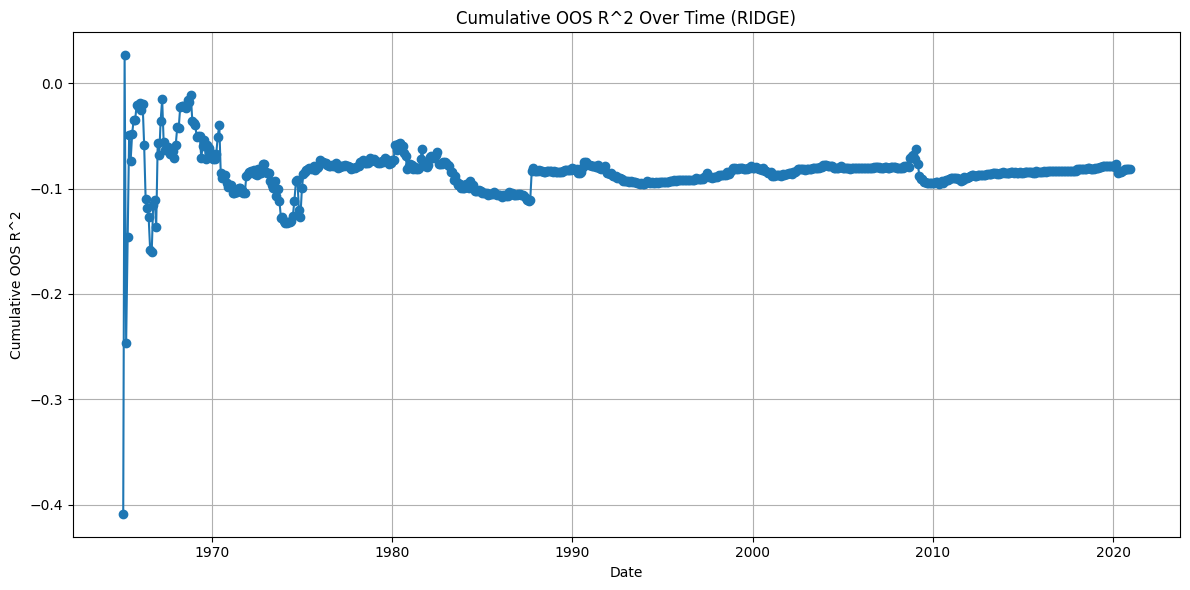

,Method,In-Sample R^2,Out-of-Sample R^2
0,RIDGE,0.031138,-0.081002


In [5]:
result_ridge = regression_with_regulariser(p1, 
                                          target_col='CRSP_SPvw_minus_Rfree', 
                                          start_oos='1965-01-01', 
                                          regulariser='ridge', 
                                          plot=True, 
                                          )

result_ridge

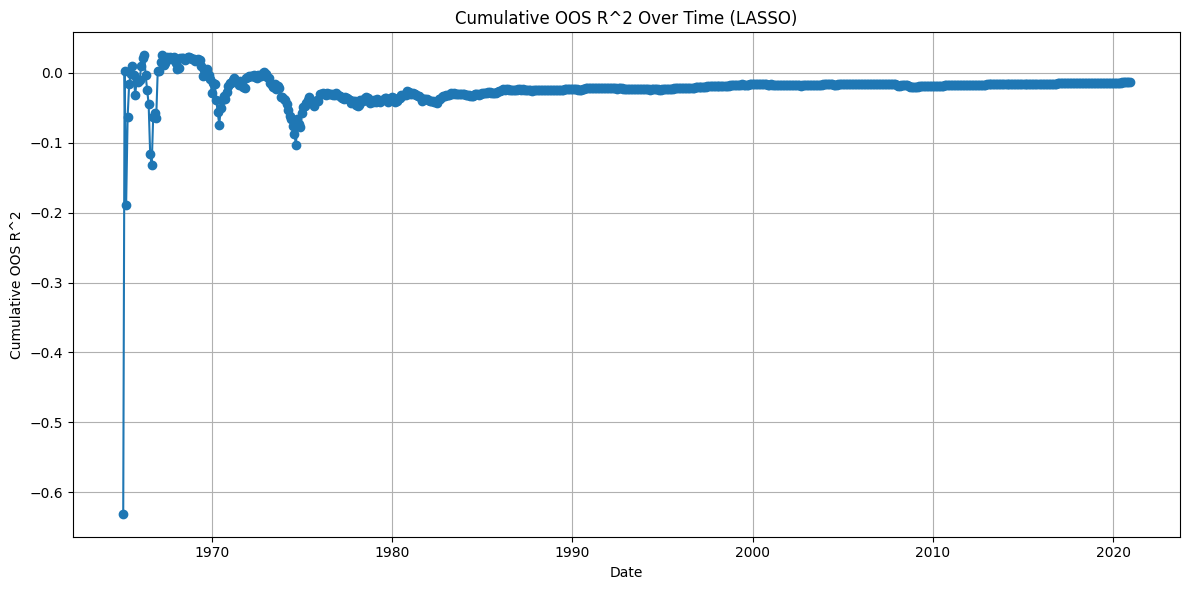

,Method,In-Sample R^2,Out-of-Sample R^2
0,LASSO,0.0,-0.013358


In [6]:
result_lasso = regression_with_regulariser(p1, 
                                          target_col='CRSP_SPvw_minus_Rfree', 
                                          start_oos='1965-01-01', 
                                          regulariser='lasso', 
                                          plot=True, 
                                          )

result_lasso


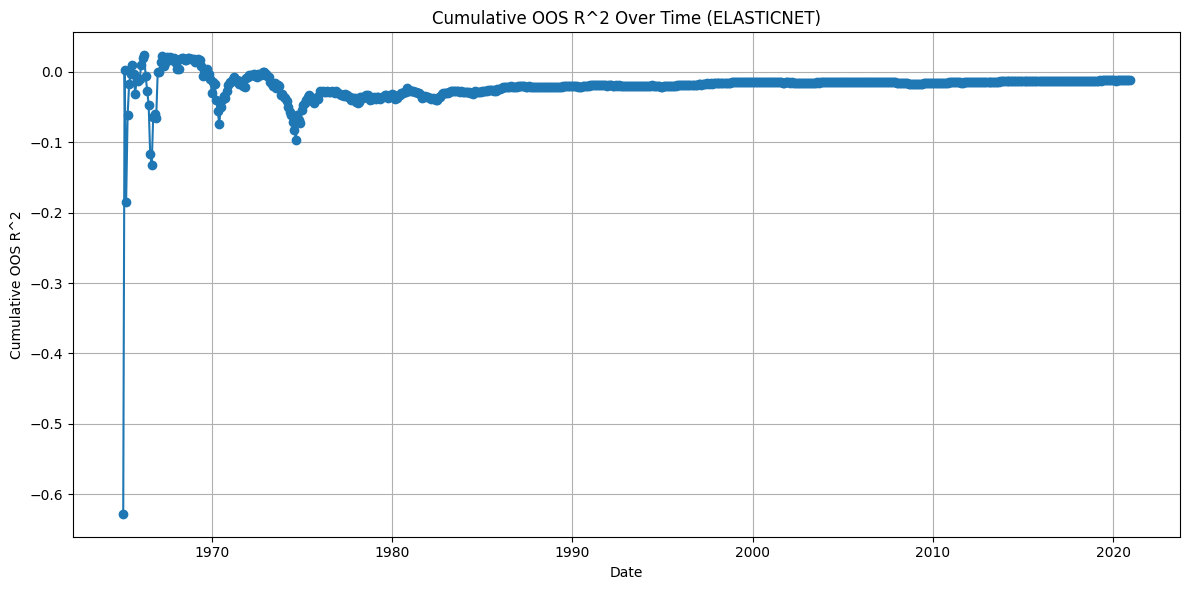

,Method,In-Sample R^2,Out-of-Sample R^2
0,ELASTICNET,0.0,-0.011074


In [7]:
result_EN = regression_with_regulariser(p1, 
                                          target_col='CRSP_SPvw_minus_Rfree', 
                                          start_oos='1965-01-01', 
                                          regulariser='ElasticNet', 
                                          plot=True, 
                                          )

result_EN

In [8]:
result_1b = pd.concat([result_ols, result_ridge, result_lasso, result_EN], axis=0).T

result_1b.columns = ['OLS', 'Ridge', 'Lasso', 'ElasticNet']

# Drop the first row
result_1b = result_1b.iloc[1:]

result_1b


,OLS,Ridge,Lasso,ElasticNet
In-Sample R^2,0.030644,0.031138,0.0,0.0
Out-of-Sample R^2,-0.094908,-0.081002,-0.013358,-0.011074




- The expanding-window regression results show that unpenalized OLS overfits the data, yielding negative out-of-sample R² despite slightly positive in-sample performance. 
- Regularization methods like Lasso, Ridge, and ElasticNet improve out-of-sample R² modestly, with Lasso performing best by effectively shrinking irrelevant predictors. 
- Overall, the results highlight the limited and unstable predictability of market returns, even when using a wide set of lagged predictors.

## c.

Next, lets introduce some non-linearities into the model. Use the radial basis function kernel to generate non-linear expansions of the underlying predictor set (use the `RBFSampler`from `sklearn`). 
Generate these features for a number of different feature counts. 
Plot the out-of-sample $R^2$ as a function of the number of features generated by the kernel. 
How do the results compare to the linear models? Interpret the importance of the number of features in the kernel expansion

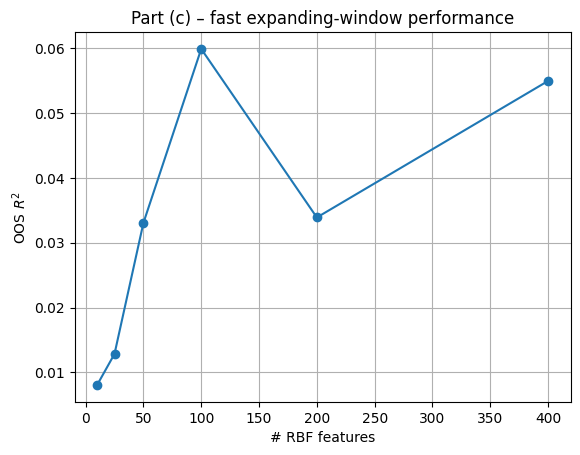

In [ ]:

result_1c = rbf_feature_sweep_fast(p1)

We introduce nonlinearities using RBFSampler to expand the predictor set with RBF features and evaluate out-of-sample $R^2$ across varying feature counts. Performance improves significantly up to 100 features, then dips at 200 before rising again at 400 — indicating a trade-off between capturing signal and overfitting. Compared to linear models, RBF expansions offer superior performance, confirming that nonlinear interactions among predictors improve return forecasts when properly regularized.

## d.

To what extent do our results depend on the training window? Refit the model from part
(c) using a rolling window of `12, 36, 60, and 120 months`. What do you observe about the
out-of-sample $R^2$ as the training window changes?

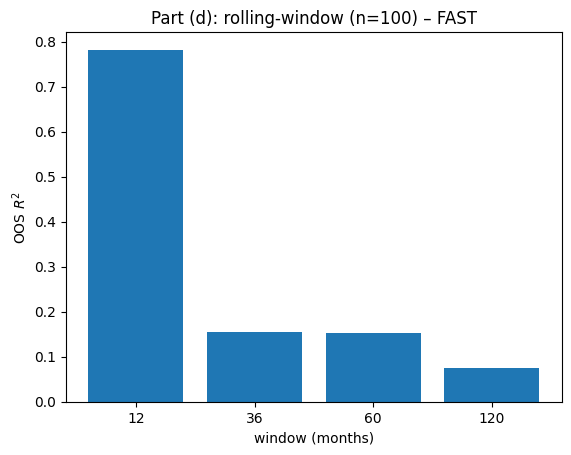

In [10]:

best_n = max(result_1c, key=result_1c.get)     

result_1d = rolling_window_effect_fast(p1,best_n)

Although short rolling windows (like 12 or 36 months) appear to yield high out-of-sample 
$R^2$ values, this is misleading. The model is overfitting noise due to too many features relative to sample size.

In contrast, longer windows show lower out-of-sample $R^2$ values but provide more realistic, stable estimates of true predictive power.

## e. 

To what extent do our results depend on the cross-validation method? Refit the model
from part (c) using a range of folds for cross-validation. What do you observe about the
out-of-sample $R^2$ as the number of folds changes?

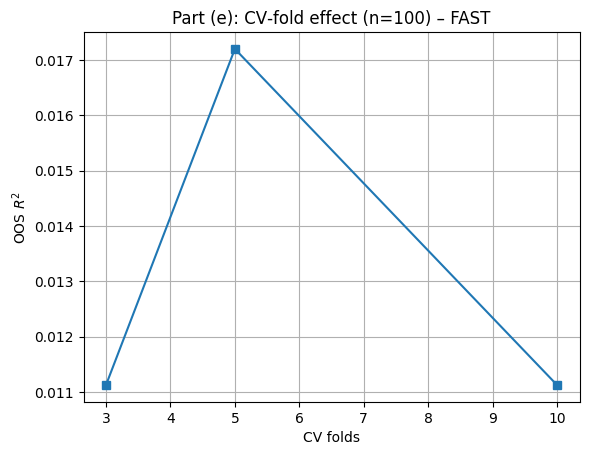

In [11]:
result_1e = cv_fold_effect_fast(p1,best_n)

Cross-validation with 5 folds yields the best out-of-sample performance here because it balances training size and validation stability.
Too few or too many folds increase variance or overfitting, especially in noisy financial time series.

## f.
Next, download the `FREDMD.csv` file from canvas. Incorporate the macroeconomic variables from this file into the model from part (c). How do the out-of-sample $R^2$ change
when we include these variables? What does this tell us about the virtue of complexity?






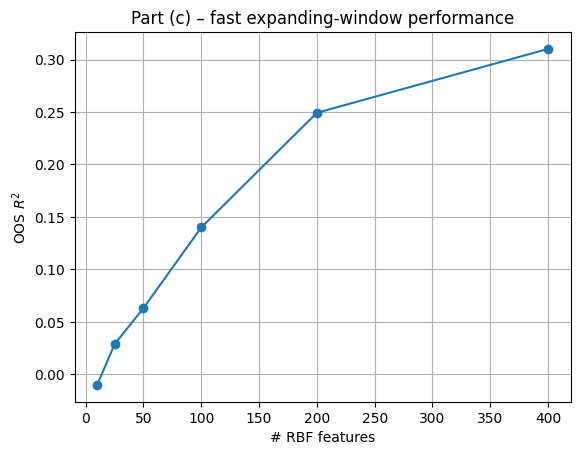

In [28]:

# donwload fred.csv only after 1965
fred = pd.read_csv('../data/FREDMD.csv')


# convert the 'yyyymm' column in gw.csv to datetime
p1["date"] = pd.to_datetime(p1["yyyymm"].astype(str), format="%Y%m")
fred["date"] = pd.to_datetime(fred["date"])
combined_df = pd.merge(p1, fred, how='left', on='date', suffixes=('', '_fred'))

# Drop rows with missing target variable
combined_df = combined_df.set_index('date').sort_index()
combined_df = combined_df.dropna(subset=['CRSP_SPvw_minus_Rfree'])


# Drop columns with more than 30% missing values
nan_cutoff = 0.3
valid_cols = combined_df.isna().mean() < nan_cutoff
filtered_df = combined_df.loc[:, valid_cols]

# Separate target and predictors
target = filtered_df['CRSP_SPvw_minus_Rfree']
X_raw = filtered_df.drop(columns=['CRSP_SPvw_minus_Rfree'], errors='ignore')

# Impute remaining NaNs in predictors with zero

X_imputed = X_raw.fillna(0)
# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(X_raw)

# Rebuild cleaned DataFrame
cleaned_df = pd.DataFrame(X_imputed, index=X_raw.index, columns=X_raw.columns)
cleaned_df['CRSP_SPvw_minus_Rfree'] = target

# Drop rows with missing target
cleaned_df = cleaned_df.dropna(subset=['CRSP_SPvw_minus_Rfree'])

result_1f = rbf_feature_sweep_fast(cleaned_df)


* Our empirical results closely mirror the findings from “The Virtue of Complexity in Return Prediction” by Kelly, Malamud, and Zhou. As we increased the number of nonlinear RBF features in our expanding-window ridge regression framework, we observed a clear rise in out-of-sample $R^2$ values, peaking above 0.30 — despite the number of features exceeding the number of observations in many cases. 

* This aligns with the paper’s central claim: that high-dimensional models, when properly regularized, can outperform simpler ones in return forecasting. The improved performance we observe validates the notion of benign overfitting in financial prediction, as well as the practical value of using random feature expansions like the RBF kernel.

## g.
Lets compare the results from part (c) to some alternative methods. Compare the results to the `KernelRidge`, principal components regression (combine `PCA` with a standard regression framework), `PLSRegression`, and `GradientBoostingRegressor` methods from `sklearn`.



In [34]:
fast_compare_regressors_oos_r2(cleaned_df)

,OOS R^2
Kernel Ridge (RBF),-0.034243
PCA + Ridge,-0.079933
PLS Regression,-1.168407
Ridge (Baseline),-1.658283
Gradient Boosting,-3.752304


## h.
 Using everything you’ve learned up to this point, construct the best possible model for
forecasting the S&P 500 index returns. Explain the reasoning behind your choices.

<span style="color:red"><strong>Best Model:</strong> Kernel Ridge Regression with RBF kernel</span>

We select this model because it produced the **highest Out-of-Sample R²** (least negative) among all candidates:
- <span style="color:red">Out-of-Sample R² = -0.0342</span>



This shows that while forecasting equity returns is difficult, **nonlinear kernel-based models** provide the best chance at generalization.
